In [21]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import save_model,load_model
import cv2
import os
import random
import numpy as np

In [22]:
training_data = image_dataset_from_directory("images_cnn/",labels="inferred",image_size=(255,255),
                                             shuffle=True,label_mode="int")

print(training_data.class_names)

Found 138 files belonging to 3 classes.
['Disha Patani', 'Donald Trump', 'Narendra Modi']


plt.figure(figsize=(12, 12))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(training_data.class_names[labels[i]])
        plt.axis("off")

# NOT NEEDED USING INBUILT 

X=[]    #images
Y=[]    #labels

Names= os.listdir("images/")
if ".DS_Store" in Names:
    Names.remove(".DS_Store")

for name in Names: 
    Images= os.listdir("images/"+name)
    if ".DS_Store" in Images:
        Images.remove(".DS_Store")
    for image in Images:
        img = cv2.imread("images/"+name+"/"+image)
        img = cv2.resize(img,(100,100))   # making image 100x100 px
        X.append(img)
        Y.append(name)
      

#SHUFFLING THE DATASET
temp = list(zip(X, Y)) 
random.shuffle(temp) 
X, Y = zip(*temp) 

In [23]:
model= keras.Sequential(
    [   # 32 is the output of conv2D and (3,3) is kernel window 
        layers.Conv2D(32, (3, 3), activation='relu',input_shape =(255,255,3)) ,   #input_shape needed if using as first layer 100*100 pixels 3 channel image
        #(2,2) is the pool window size where we take max
        layers.MaxPooling2D((2, 2)) ,
        layers.Flatten(),
        # As we currently have 3 people to reco hence 3 and softmax obviously to give ans between 0 to 1
        layers.Dense(3, activation='softmax')
    ]
)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.summary()


In [24]:
model.fit(training_data, batch_size = 1 , epochs = 30)

Epoch 1/30
5/5 [==============================] - 3s 631ms/step - loss: 11199.8740 - accuracy: 0.2971
Epoch 2/30
5/5 [==============================] - 3s 640ms/step - loss: 3671.1748 - accuracy: 0.4493
Epoch 3/30
5/5 [==============================] - 3s 556ms/step - loss: 3814.1038 - accuracy: 0.5217
Epoch 4/30
5/5 [==============================] - 3s 585ms/step - loss: 943.9830 - accuracy: 0.5072
Epoch 5/30
5/5 [==============================] - 3s 601ms/step - loss: 1104.9117 - accuracy: 0.5725
Epoch 6/30
5/5 [==============================] - 3s 594ms/step - loss: 370.2701 - accuracy: 0.7391
Epoch 7/30
5/5 [==============================] - 3s 594ms/step - loss: 249.2166 - accuracy: 0.8043
Epoch 8/30
5/5 [==============================] - 3s 628ms/step - loss: 116.5452 - accuracy: 0.8551
Epoch 9/30
5/5 [==============================] - 3s 586ms/step - loss: 53.1311 - accuracy: 0.9203
Epoch 10/30
5/5 [==============================] - 3s 560ms/step - loss: 29.6632 - accuracy: 0.9

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 508032)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1524099   
Total params: 1,524,995
Trainable params: 1,524,995
Non-trainable params: 0
_________________________________________________________________


In [26]:
save_model(model,'./');

INFO:tensorflow:Assets written to: ./assets


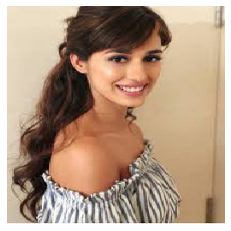

[[1. 0. 0.]]
Disha Patani


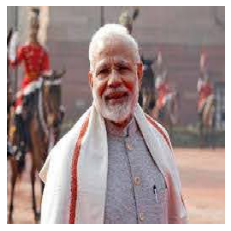

[[0. 0. 1.]]
Narendra Modi


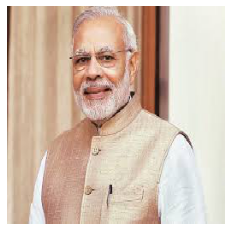

[[1. 0. 0.]]
Disha Patani


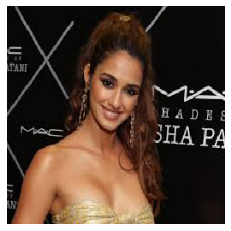

[[1. 0. 0.]]
Disha Patani


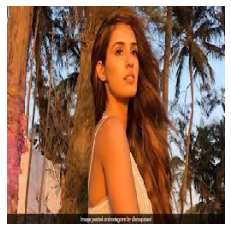

[[1. 0. 0.]]
Disha Patani


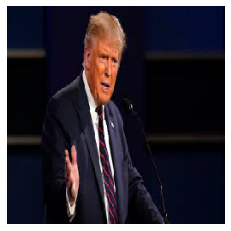

[[0. 1. 0.]]
Donald Trump


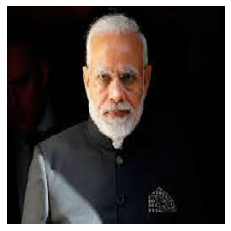

[[0. 0. 1.]]
Narendra Modi


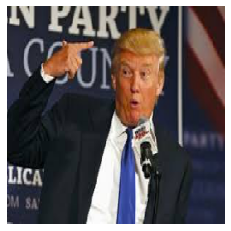

[[0. 1. 0.]]
Donald Trump


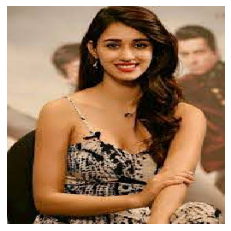

[[1. 0. 0.]]
Disha Patani


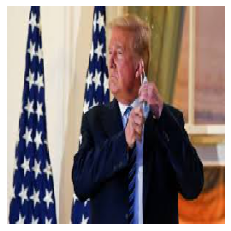

[[0. 1. 0.]]
Donald Trump


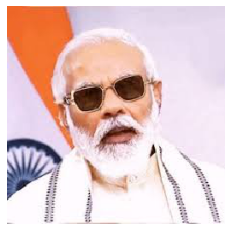

[[0. 0. 1.]]
Narendra Modi


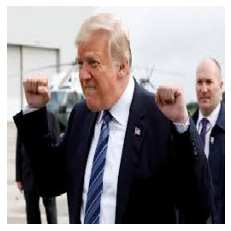

[[0. 1. 0.]]
Donald Trump


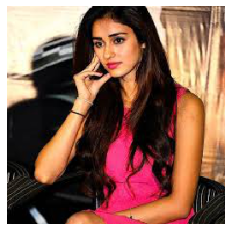

[[1. 0. 0.]]
Disha Patani


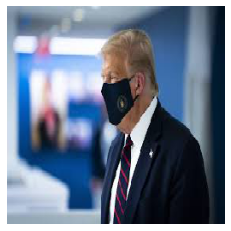

[[0. 1. 0.]]
Donald Trump


In [27]:
model = load_model('./',compile=True)
test = os.listdir('test_dataset')
for i in test :
    img = image.load_img('test_dataset/'+ i,target_size=(255,255))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
    
    X = image.img_to_array(img) #converting images to array
    X = np.expand_dims(X,axis =0) #not utilising data genrator so we are providing additional dimension to dataset

    var = model.predict(X)
    print (var)
    maxval = np.amax(var)
    index = np.where(var[0] == maxval)
    print(training_data.class_names[index[0][0]])